In [1]:
!ls ../experiments/logs

pcfg_4_4_128_llama  pcfg_4_4_32_llama  pcfg_4_4_64_llama_old  test_ar
pcfg_4_4_16_llama   pcfg_4_4_64_llama  test


In [2]:
import glob
import os
import pandas as pd
import plotnine as p9

In [29]:
dfs = []
for file in glob.glob("../experiments/logs/**/ProbeEvaluator.csv") + glob.glob("../experiments/logs/**/SummaryEvaluator.csv") + glob.glob("../experiments/logs/**/InterchangeEvaluator.csv"):
    if "old" in file: continue
    if "test" in file: continue
    print(file)
    evaluator = file.split("/")[-1].split(".")[0]
    splitted = os.path.dirname(file).split("/")[-1].split(".")[0].split("_")[:-1]
    pos = "left"
    if len(splitted) == 5:
        _, layers, heads, dim, pos = splitted
    else:
        _, layers, heads, dim = splitted
    log = pd.read_csv(file)
    print(len(log))
    log["identifier"] = layers + "_" + heads + "_" + dim
    if layers.strip() != "4":
        continue
    log["layers"] = int(layers)
    log["heads"] = int(heads)
    log["dim"] = int(dim)
    log["evaluator"] = evaluator
    log["step_rel"] = log["step"] / log["step"].max()
    log["pos"] = pos
    log = log.groupby(["variable", "step", "layers", "heads", "dim", "evaluator", "step_rel", "identifier", "pos"]).mean().reset_index()
    dfs.append(log)
print(len(dfs))
df = pd.concat(dfs)
df = df.groupby(["variable", "step", "layers", "heads", "dim", "evaluator", "step_rel", "identifier", "pos"]).mean().reset_index()
df

../experiments/logs/pcfg_4_4_128_llama/ProbeEvaluator.csv
1050
../experiments/logs/pcfg_4_4_32_llama/ProbeEvaluator.csv
1050
../experiments/logs/pcfg_4_4_64_llama/ProbeEvaluator.csv
1050
../experiments/logs/pcfg_4_4_16_llama/ProbeEvaluator.csv
1050
../experiments/logs/pcfg_4_4_128_llama/SummaryEvaluator.csv
646501
../experiments/logs/pcfg_4_4_32_llama/SummaryEvaluator.csv
646501
../experiments/logs/pcfg_4_4_64_llama/SummaryEvaluator.csv
646501
../experiments/logs/pcfg_4_4_16_llama/SummaryEvaluator.csv
646501
../experiments/logs/pcfg_4_4_128_llama/InterchangeEvaluator.csv
10752000
../experiments/logs/pcfg_4_4_32_llama/InterchangeEvaluator.csv
10752000
../experiments/logs/pcfg_4_4_64_llama/InterchangeEvaluator.csv
10752000
../experiments/logs/pcfg_4_4_16_llama/InterchangeEvaluator.csv
10752000
12


,variable,step,layers,heads,dim,evaluator,step_rel,identifier,pos,value
0,0.PARENT.query_item_orig.divider.acc,0,4,4,16,ProbeEvaluator,0.00,4_4_16,left,0.226250
1,0.PARENT.query_item_orig.divider.acc,0,4,4,32,ProbeEvaluator,0.00,4_4_32,left,0.226250
2,0.PARENT.query_item_orig.divider.acc,0,4,4,64,ProbeEvaluator,0.00,4_4_64,left,0.226250
3,0.PARENT.query_item_orig.divider.acc,0,4,4,128,ProbeEvaluator,0.00,4_4_128,left,0.226250
4,0.PARENT.query_item_orig.divider.acc,2500,4,4,128,ProbeEvaluator,0.05,4_4_128,left,0.226250
...,...,...,...,...,...,...,...,...,...,...
23015,query_item.pred_prob,384000,4,4,16,SummaryEvaluator,0.96,4_4_16,left,0.911181
23016,query_item.pred_prob,388000,4,4,16,SummaryEvaluator,0.97,4_4_16,left,0.909321
23017,query_item.pred_prob,392000,4,4,16,SummaryEvaluator,0.98,4_4_16,left,0.909197
23018,query_item.pred_prob,396000,4,4,16,SummaryEvaluator,0.99,4_4_16,left,0.910941


In [22]:
df[df["variable"].str.contains("pred_prob")][df["step_rel"] == 1.00]

/tmp/aryaman/ipykernel_2925262/2762736752.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,variable,step,layers,heads,dim,evaluator,step_rel,identifier,pos,value
4794,PARENT.query_item.pred_prob,50000,4,4,128,SummaryEvaluator,1.0,4_4_128,left,0.926844
4882,PARENT.query_item.pred_prob,100000,4,4,64,SummaryEvaluator,1.0,4_4_64,left,0.927320
4957,PARENT.query_item.pred_prob,200000,4,4,32,SummaryEvaluator,1.0,4_4_32,left,0.928077
5007,PARENT.query_item.pred_prob,400000,4,4,16,SummaryEvaluator,1.0,4_4_16,left,0.907041
6006,query_item.pred_prob,50000,4,4,128,SummaryEvaluator,1.0,4_4_128,left,0.926844
6094,query_item.pred_prob,100000,4,4,64,SummaryEvaluator,1.0,4_4_64,left,0.927320
6169,query_item.pred_prob,200000,4,4,32,SummaryEvaluator,1.0,4_4_32,left,0.928077
6219,query_item.pred_prob,400000,4,4,16,SummaryEvaluator,1.0,4_4_16,left,0.907041


/juice2/scr2/aryaman/tinylang/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


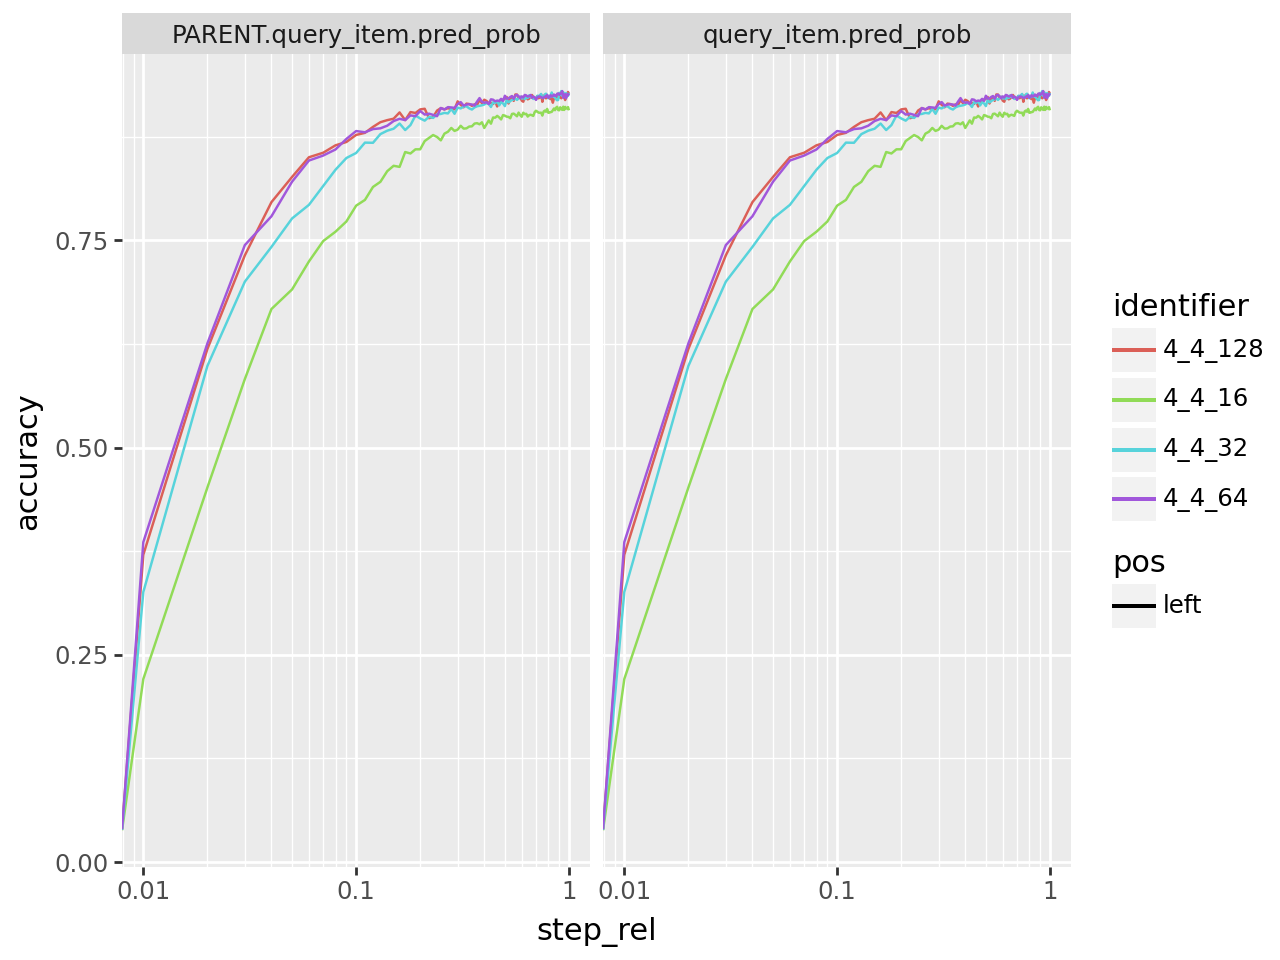

In [9]:
plot = (
    p9.ggplot(df[df["variable"].str.contains("pred_prob")], p9.aes(x="step_rel", y="value", color="identifier", linetype="pos")) +
    p9.geom_line() +
    p9.facet_wrap("~variable") +
    p9.scale_x_log10() +
    p9.labs(y="accuracy")
)
plot.show()

/juice2/scr2/aryaman/tinylang/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


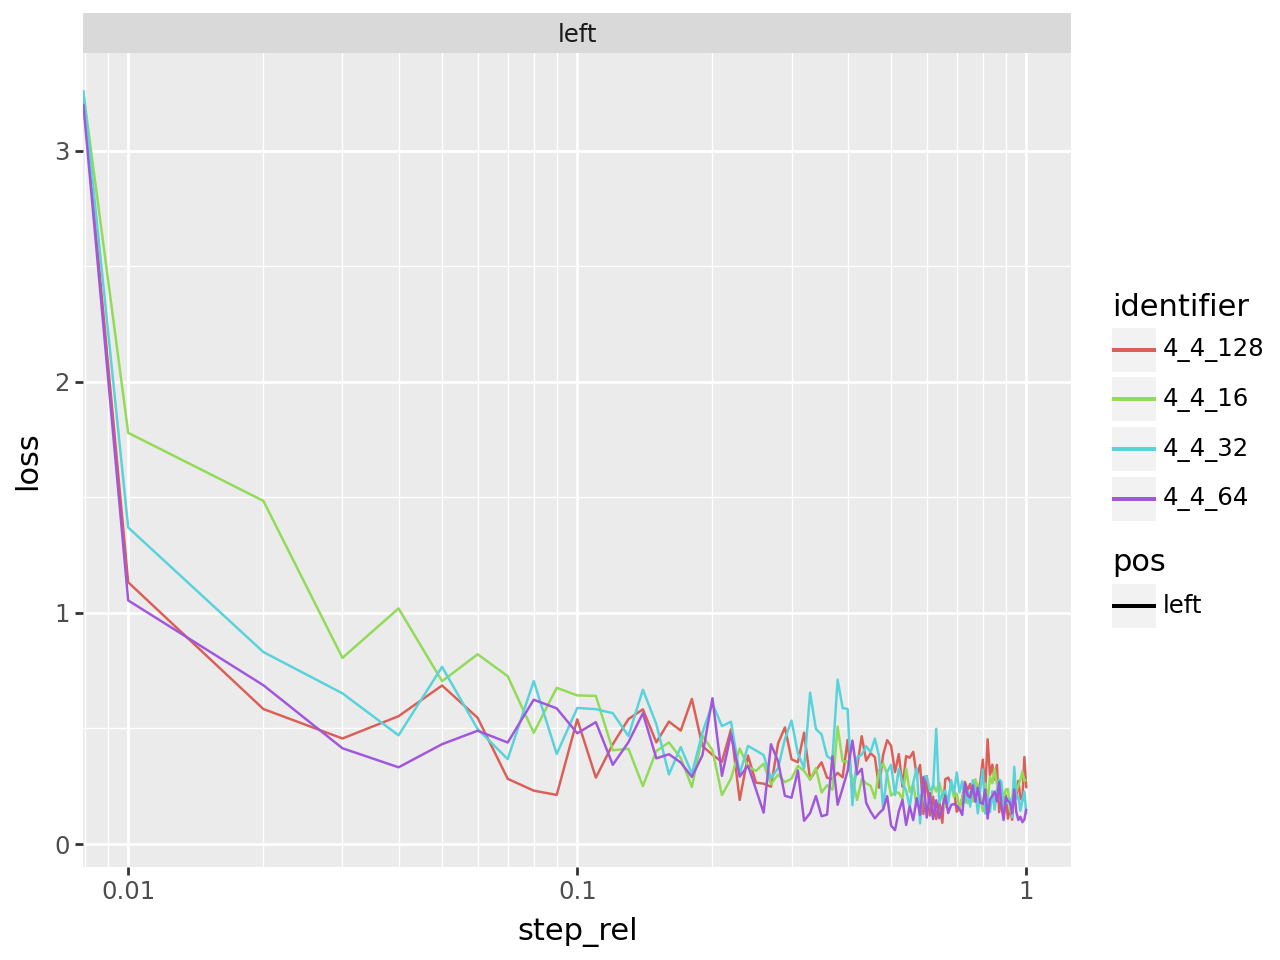

In [11]:
plot = (
    p9.ggplot(df[df["variable"] == "loss"], p9.aes(x="step_rel", y="value", color="identifier", linetype="pos")) +
    p9.geom_line() +
    p9.facet_wrap("~pos") +
    p9.scale_x_log10() +
    p9.labs(y="loss")
)
plot.show()

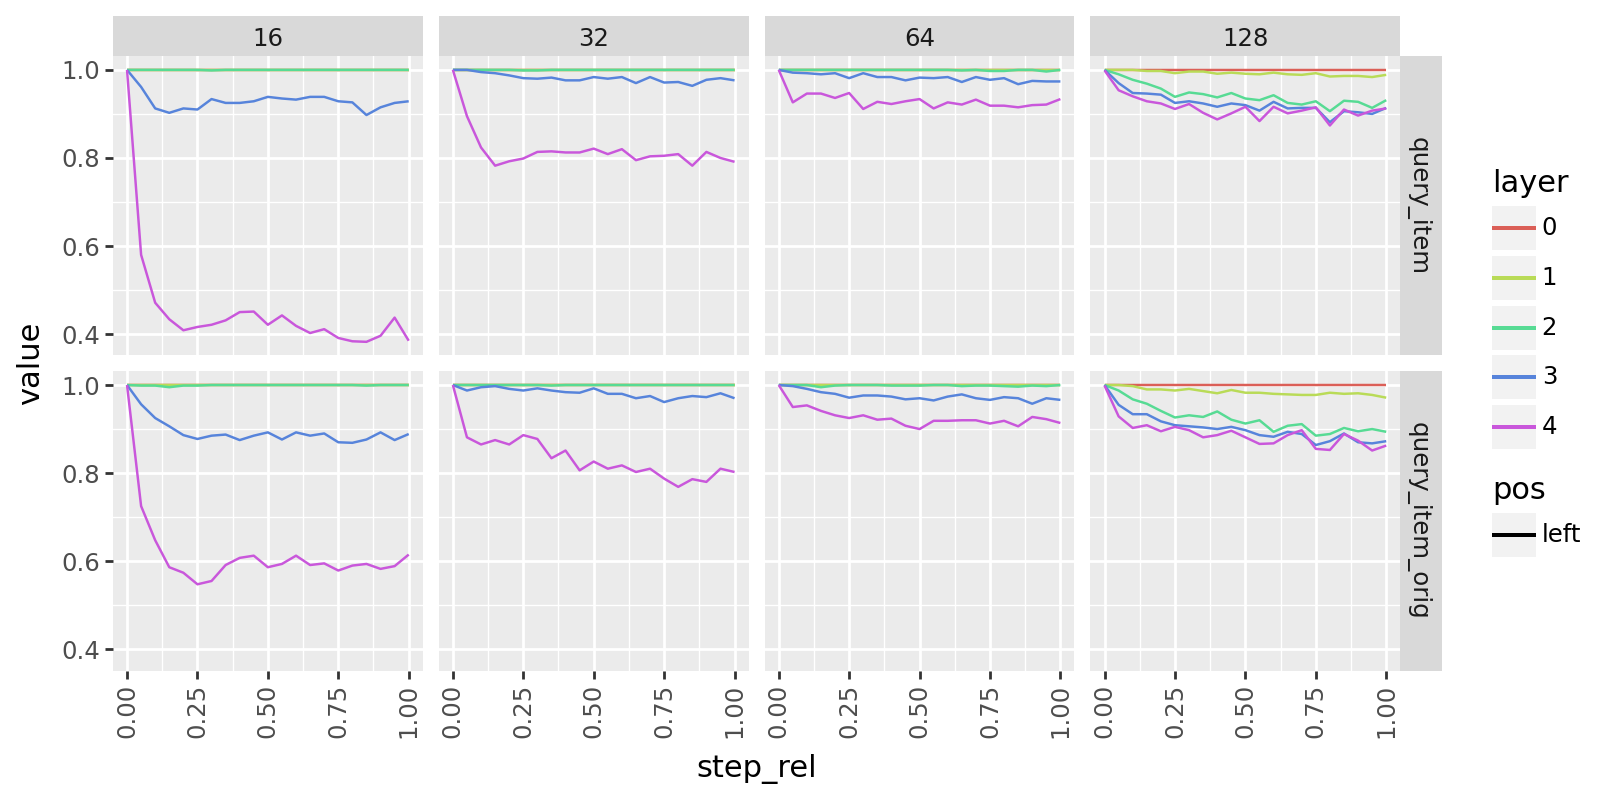

In [25]:
df_temp = df.copy()
df_temp = df_temp[df_temp["evaluator"] == "ProbeEvaluator"]
df_temp = df_temp[df_temp["layers"] == 4]
df_temp["layer"] = df_temp["variable"].str.split(".").str[0]
df_temp["type"] = df_temp["variable"].str.split(".").str[1]
df_temp["label_type"] = df_temp["variable"].str.split(".").str[2]
df_temp["query"] = df_temp["variable"].str.split(".").str[3]
df_temp
plot = (
    p9.ggplot(df_temp[df_temp["variable"].str.contains("PARENT.query_item_orig") & df_temp["query"].str.contains("query")], p9.aes(x="step_rel", y="value", color="layer", linetype="pos")) +
    p9.geom_line() +
    p9.facet_grid("query~dim") +
    p9.theme(axis_text_x=p9.element_text(rotation=90, hjust=0.5), figure_size=(8, 4))
    # p9.scale_x_log10()
)
plot.show()

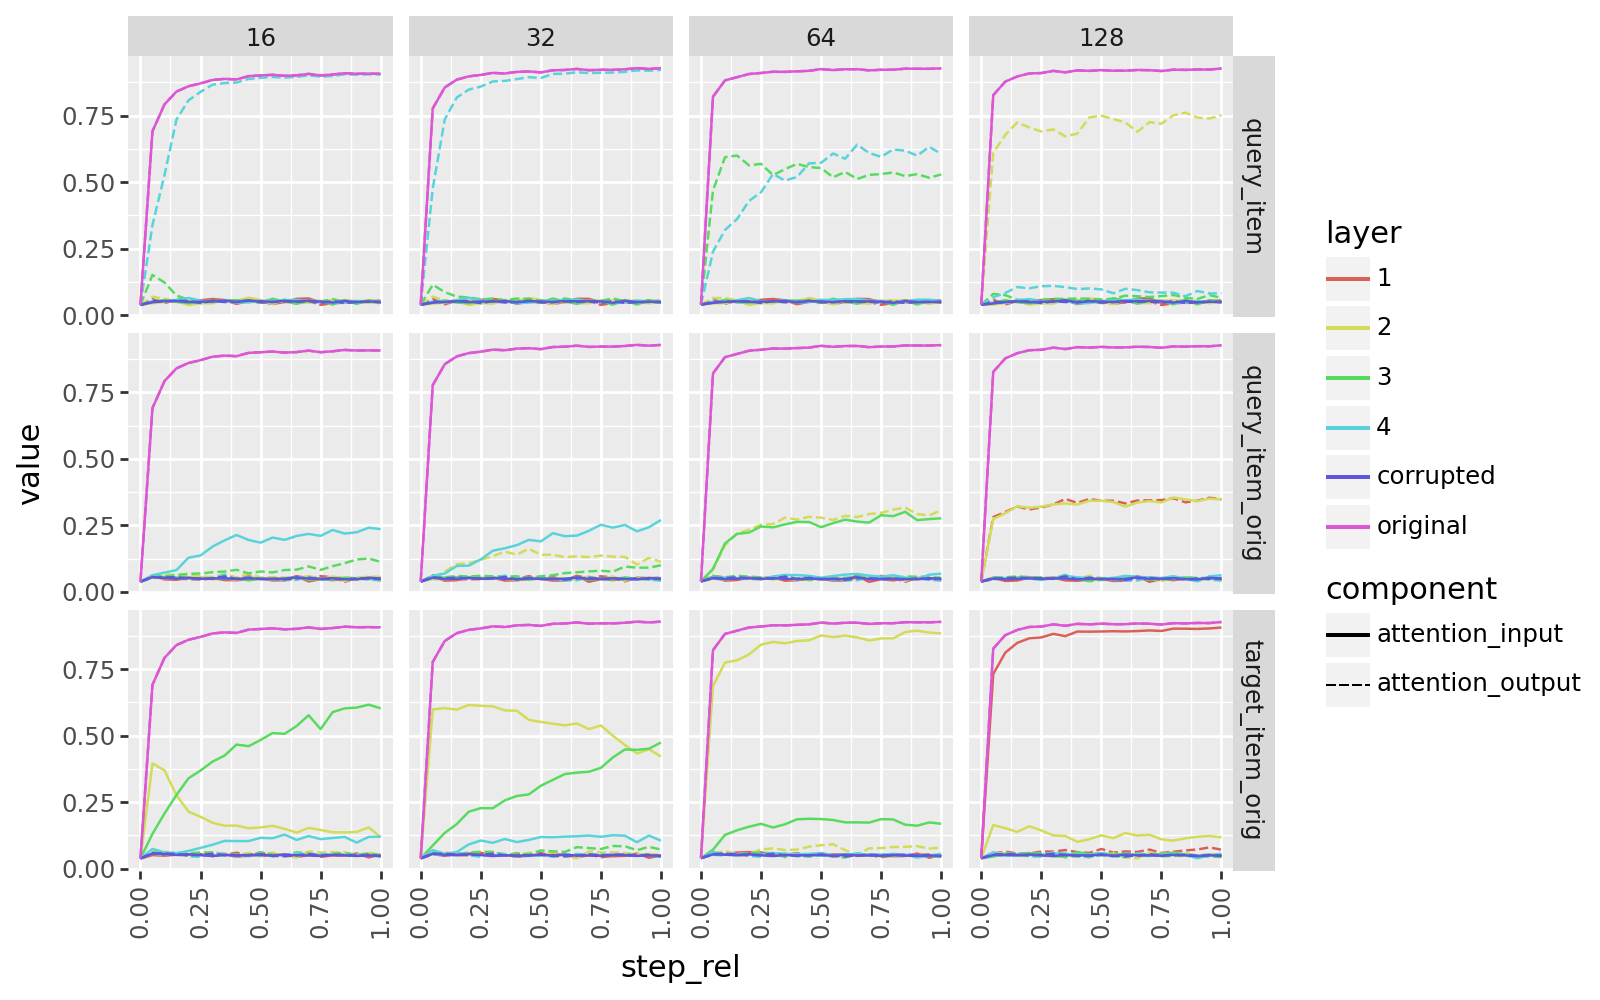

In [42]:
df_temp = df.copy()
df_temp = df_temp[df_temp["evaluator"] == "InterchangeEvaluator"]
df_temp = df_temp[df_temp["layers"] == 4]
df_temp["layer"] = df_temp["variable"].str.split(".").str[0]
df_temp["type"] = df_temp["variable"].str.split(".").str[1]
df_temp["label_type"] = df_temp["variable"].str.split(".").str[2]
df_temp["query"] = df_temp["variable"].str.split(".").str[3]
df_temp["component"] = df_temp["variable"].str.split(".").str[4]
df_temp = df_temp[df_temp["variable"].str.contains("PARENT.target_item_orig") & (df_temp["query"].str.contains("query") | df_temp["query"].str.contains("target_item_orig"))]
df_temp = df_temp[df_temp["variable"].str.contains("restored")]
plot = (
    p9.ggplot(df_temp, p9.aes(x="step_rel", y="value", color="layer", linetype="component")) +
    p9.geom_line() +
    p9.facet_grid("query~dim") +
    p9.theme(axis_text_x=p9.element_text(rotation=90, hjust=0.5), figure_size=(8, 5))
    # p9.scale_x_log10()
)
plot.show()

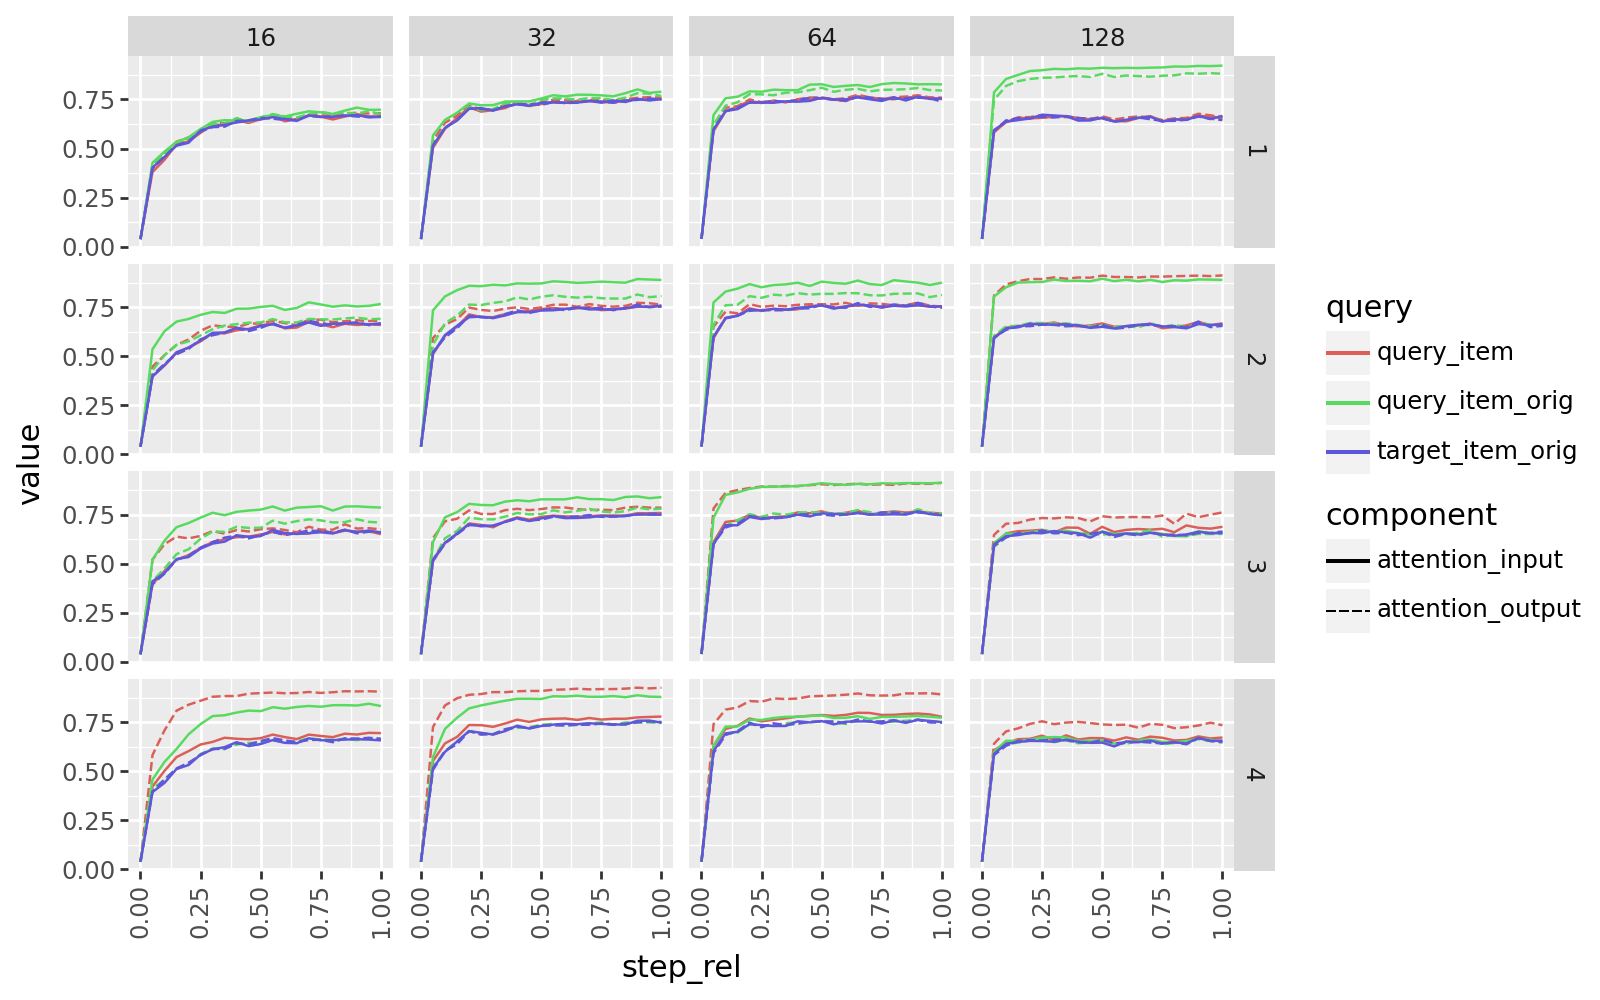

In [46]:
df_temp = df.copy()
df_temp = df_temp[df_temp["evaluator"] == "InterchangeEvaluator"]
df_temp = df_temp[df_temp["layers"] == 4]
df_temp["layer"] = df_temp["variable"].str.split(".").str[0]
df_temp["type"] = df_temp["variable"].str.split(".").str[1]
df_temp["label_type"] = df_temp["variable"].str.split(".").str[2]
df_temp["query"] = df_temp["variable"].str.split(".").str[3]
df_temp["component"] = df_temp["variable"].str.split(".").str[4]
df_temp = df_temp[df_temp["variable"].str.contains("PARENT.query_item_orig") & (df_temp["query"].str.contains("query") | df_temp["query"].str.contains("target_item_orig"))]
df_temp = df_temp[df_temp["variable"].str.contains("restored")]
df_temp = df_temp[~df_temp["layer"].isin(["original", "corrupted"])]
plot = (
    p9.ggplot(df_temp, p9.aes(x="step_rel", y="value", color="query", linetype="component")) +
    p9.geom_line() +
    p9.facet_grid("layer~dim") +
    p9.theme(axis_text_x=p9.element_text(rotation=90, hjust=0.5), figure_size=(8, 5))
    # p9.scale_x_log10()
)
plot.show()

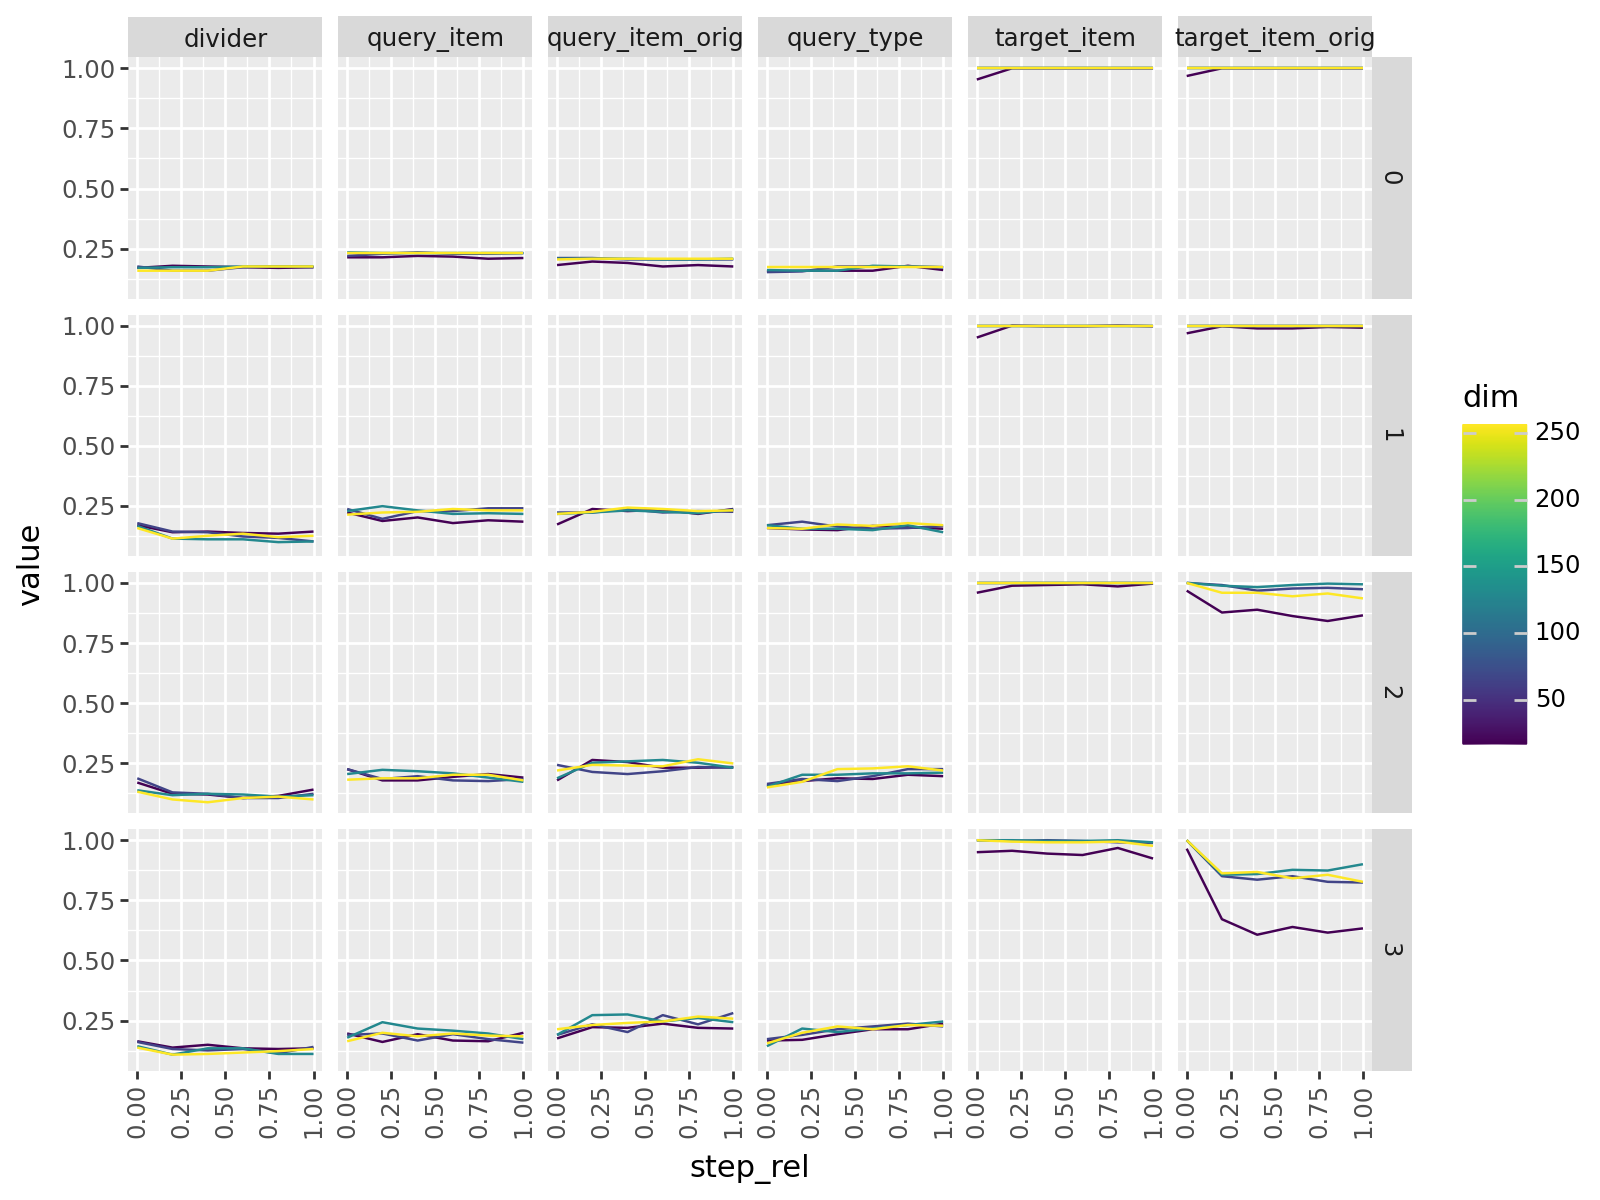

In [46]:
plot = (
    p9.ggplot(df_temp[df_temp["variable"].str.contains("SIBLING")], p9.aes(x="step_rel", y="value", color="dim", group="dim")) +
    p9.geom_line() +
    p9.facet_grid("layer~query") +
    p9.theme(axis_text_x=p9.element_text(rotation=90, hjust=0.5), figure_size=(8, 6))
)
plot.show()